In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package, in lpa')

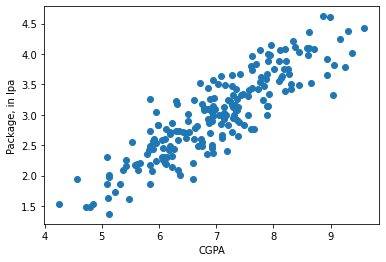

In [3]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package, in lpa')

In [4]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)      #fit is used for data training

LinearRegression()

Text(0, 0.5, 'Package, in lpa')

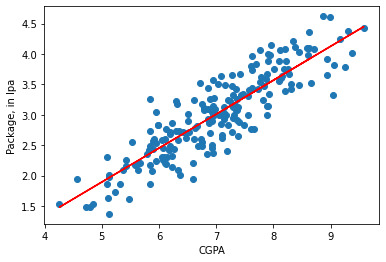

In [7]:
plt.scatter(df['cgpa'], df['package'])
# plot of best fit line that is predicted on x_train data
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package, in lpa')

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(x_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [14]:
print("MAE", mean_absolute_error(y_test, y_pred))
# in terms of lpa

MAE 0.2884710931878175


In [15]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [16]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
# in terms of lpa

RMSE 0.34827051717731616


In [17]:
print("r2_score", r2_score(y_test, y_pred))

r2 score 0.780730147510384


In [18]:
x_test.shape

(40, 1)

In [19]:
r2 = r2_score(y_test, y_pred)

# Adjusted R2
1 - ((1-r2) * (40-1) / (40-1-1))

0.7749598882343415

## Adding irrelevant column

In [27]:
# Adding random col to data, which is irrelevant
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa', 'random_feature', 'package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.287849,3.26
1,5.12,0.596066,1.98
2,7.82,0.086540,3.25
3,7.42,0.234278,3.67
4,6.94,0.699054,3.57


Text(0, 0.5, 'package in lpa')

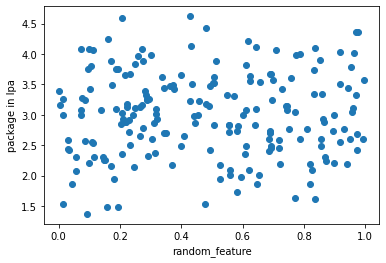

In [28]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel("random_feature")
plt.ylabel("package in lpa")

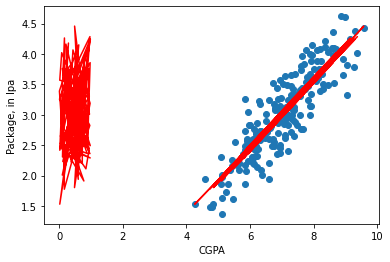

In [32]:
x = new_df.iloc[:, 0:2]
y = new_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)

plt.scatter(df['cgpa'], df['package'])
# plot of best fit line that is predicted on x_train data
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package, in lpa')

y_pred = lr.predict(x_test)


In [33]:
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.7857913807956921


In [34]:
r2 = r2_score(y_test, y_pred)

# Adjusted R2
1 - ((1-r2) * (40-1) / (40-1-2))

0.7742125365143782

## Adding relevant column

In [35]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
16,6.84,1.15,2.35
74,6.85,2.54,3.44
113,6.94,3.07,2.37
79,7.18,3.70,3.00
130,6.68,2.79,2.49


Text(0, 0.5, 'Package(in lpa)')

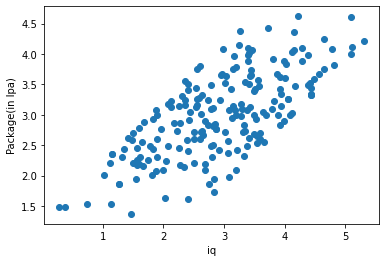

In [36]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [37]:
np.random.randint(-100,100)

-78

In [38]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8278607476247963


In [40]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8185559231720826